# Analise Exploratória do dataset SciELO

O [SciELO - Scientific Electronic Library Online](http://www.scielo.org) - divulga alguns datasets de publicações processadas e indexadas em suas bases de dados. Neste notebook vamos explorar o dataset Brasileiro, em especial o `journals.csv`

Este e outros datasets podem ser baixados em: [https://analytics.scielo.org/w/reports](https://analytics.scielo.org/w/reports)

A documentação esta disponível em: [http://docs.scielo.org/projects/scielo-processing/pt/latest/public_reports.html](http://docs.scielo.org/projects/scielo-processing/pt/latest/public_reports.html)

## Baixando o dataset

In [6]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import zipfile

data_path = 'data/'
file_path = data_path + 'tabs_bra.zip'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(file_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='SciELO Dataset') as pbar:
        urlretrieve(
            'https://static.scielo.org/tabs/tabs_bra.zip',
            file_path,
            pbar.hook
        )

#if not isdir(cifar10_dataset_folder_path):
with zipfile.ZipFile(file_path) as zipf:
    zipf.extractall(data_path)


---
Com os dados em disco, vamos importar os pacotes necessários para iniciar a analise com Pandas

In [44]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 5)

In [9]:
journals = pd.read_csv('data/journals.csv', index_col=False)
journals.head()

,extraction date,study unit,collection,ISSN SciELO,ISSN's,title at SciELO,title thematic areas,title is agricultural sciences,title is applied social sciences,title is biological sciences,...,google scholar h5 2015,google scholar h5 2014,google scholar h5 2013,google scholar h5 2012,google scholar m5 2017,google scholar m5 2016,google scholar m5 2015,google scholar m5 2014,google scholar m5 2013,google scholar m5 2012
0,2017-10-26,journal,scl,1676-5648,1676-5648,RAE eletrônica,Applied Social Sciences,0,1,0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN
1,2017-10-26,journal,scl,0101-8108,0101-8108,Revista de Psiquiatria do Rio Grande do Sul,Health Sciences,0,0,0,...,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN
2,2017-10-26,journal,scl,0034-7701,0034-7701,Revista de Antropologia,Human Sciences,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-26,journal,scl,0102-261X,0102-261X,Revista Brasileira de Geofísica,Exact and Earth Sciences,0,0,0,...,5.0,6.0,7.0,NaN,NaN,NaN,7.0,6.0,7.0,NaN
4,2017-10-26,journal,scl,1516-9332,1516-9332,Revista Brasileira de Ciências Farmacêuticas,Health Sciences,0,0,0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN


In [10]:
journals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 98 columns):
extraction date                           360 non-null object
study unit                                360 non-null object
collection                                360 non-null object
ISSN SciELO                               360 non-null object
ISSN's                                    358 non-null object
title at SciELO                           360 non-null object
title thematic areas                      360 non-null object
title is agricultural sciences            360 non-null int64
title is applied social sciences          360 non-null int64
title is biological sciences              360 non-null int64
title is engineering                      360 non-null int64
title is exact and earth sciences         360 non-null int64
title is health sciences                  360 non-null int64
title is human sciences                   360 non-null int64
title is linguistics, letters and 

### title thematic areas

Um dos campos que chamou minha atenção foi o `title thematic areas` que, segundo a [documentação](http://docs.scielo.org/projects/scielo-processing/pt/latest/public_reports.html#title-thematic-areas) representa "A lista de áreas temáticas indica as possíveis áreas de um título". Vamos analisar mais de perto e ver quais informações este campo pode nos dar.

In [11]:
journals['title thematic areas'].head()

0     Applied Social Sciences
1             Health Sciences
2              Human Sciences
3    Exact and Earth Sciences
4             Health Sciences
Name: title thematic areas, dtype: object

In [13]:
journals['title thematic areas'].describe()

count                 360
unique                 20
top       Health Sciences
freq                   99
Name: title thematic areas, dtype: object

In [63]:
journals['title thematic areas'].value_counts()

Health Sciences                                                                                                  99
Human Sciences                                                                                                   78
Agricultural Sciences                                                                                            37
Applied Social Sciences                                                                                          36
Biological Sciences                                                                                              24
Engineering                                                                                                      21
Linguistics, Letters and Arts                                                                                    16
Exact and Earth Sciences                                                                                         13
Applied Social Sciences;Human Sciences                                  

Vemos que periódicos na área de Saúde são maioria na base.

Aqui vemos que existem periódicos com mais de uma categoria, chegando a 6 categorias no mesmo periódico. Vamos avaliar um destes registros

In [38]:
journals[
    journals['title thematic areas'] == 
         'Agricultural Sciences;Biological Sciences;Engineering;Exact and Earth Sciences;Health Sciences;Human Sciences'
].T[:30]

,67
extraction date,2017-10-26
study unit,journal
collection,scl
ISSN SciELO,0001-3765
ISSN's,0001-3765;1678-2690
title at SciELO,Anais da Academia Brasileira de Ciências
title thematic areas,Agricultural Sciences;Biological Sciences;Engi...
title is agricultural sciences,1
title is applied social sciences,0
title is biological sciences,1


Aparentemente os periódicos com mais de uma categoria são realmente mais "genéricos" e acredito que não exista erro nesta classificação. Vamos ver a distribuição (%) dos periódicos nas principais categorias

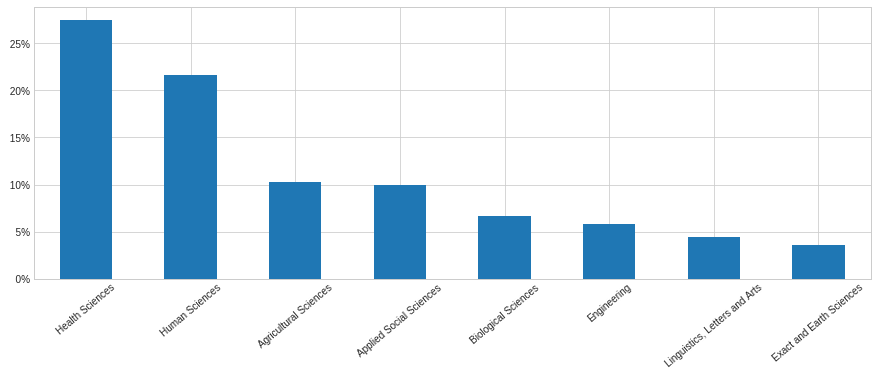

In [78]:
to_plot = journals['title thematic areas'].value_counts(normalize=True)
ax = to_plot[to_plot > 0.03].plot(kind='bar', rot=40)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.show()

### google scholar h5

Segundo [este site](https://bsf.org.br/2012/04/05/google-scholar-metrics-bibliometria-fator-impacto-citacoes-indice-h/) o índice h5 é "o índice-h (de Hirsch) é o maior número h considerando que um certo número h de artigos em um periódico foram citados pelo menos um certo número h de vezes."

Vamos analisar como este índice de citações se comportou ao longo dos anos em cada categoria de periódico. Para isso, vamos aplicar uma alteração nos registros que pertencem a mais de uma categoria para manter apenas a primeira delas.

**ATENÇÃO**: Estou inferindo que a primeira categoria seria "a principal" e esta alteração visa simplificar a visualização.

In [93]:
journals['title thematic areas'] = journals['title thematic areas'].apply(lambda x: x.split(';')[:1][0])

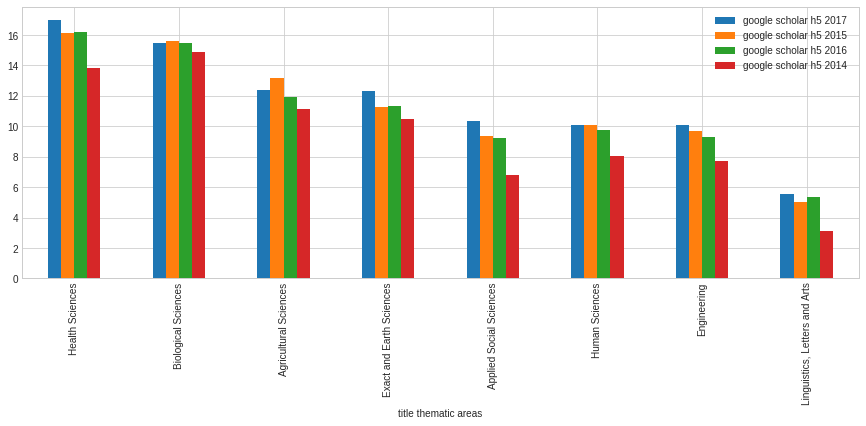

In [94]:
journals.groupby('title thematic areas').agg({
    'google scholar h5 2017 ':'mean',
    'google scholar h5 2016 ':'mean',
    'google scholar h5 2015 ':'mean',
    'google scholar h5 2014 ':'mean',
}).sort_values(by='google scholar h5 2017 ', ascending=False).plot(kind='bar')

Vemos que a categoria de periódicos em Saúde são os mais citados em média, o que pode se justificar com o maior número de periódicos nesta categoria. Vamos ver então, o máximo de citações no lugar da média de citações.

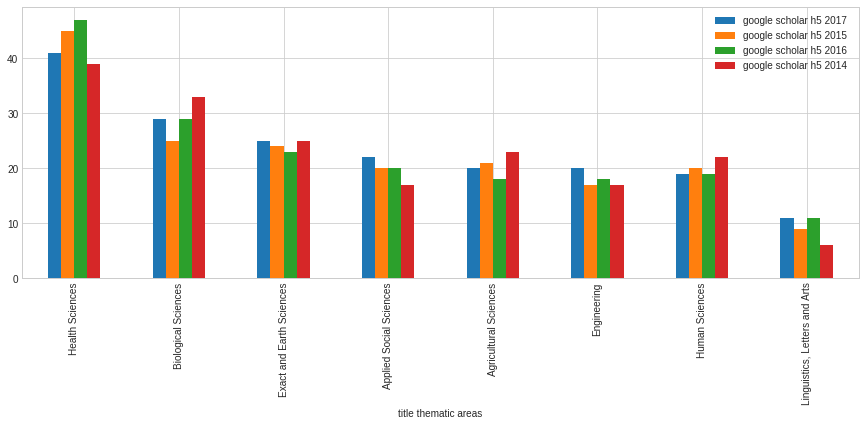

In [95]:
journals.groupby('title thematic areas').agg({
    'google scholar h5 2017 ':'max',
    'google scholar h5 2016 ':'max',
    'google scholar h5 2015 ':'max',
    'google scholar h5 2014 ':'max',
}).sort_values(by='google scholar h5 2017 ', ascending=False).plot(kind='bar')

Ao plotar o máximo houve mudanças nas posições 3 a 7, mostrando que estas categorias tem periódicos que se destacam. A diferença entre a 1ª e 2ª posições fica mais evidente e a diferença entre os anos (2014 a 2017) também apresenta diferenças em comparação com a média.

### publisher name

Vamos avaliar o campo `publisher name` para ver a diversidade de editores.

In [102]:
journals['publisher name'].describe()

count                                                   360
unique                                                  327
top       Instituto Oceanográfico da Universidade de São...
freq                                                      3
Name: publisher name, dtype: object

In [103]:
journals['publisher name'].value_counts()[:15]

Instituto Oceanográfico da Universidade de São Paulo      3
Universidade Federal de Santa Catarina                    3
Sociedade Brasileira de Fonoaudiologia                    3
Universidade Estadual de Maringá                          2
Sociedade Entomológica do Brasil                          2
Sociedade Brasileira de Fisiologia Vegetal                2
Faculdade de Educação da Universidade de São Paulo        2
Sociedade Brasileira de Microbiologia                     2
Sociedade Brasileira de Endocrinologia e Metabologia      2
Universidade de São Paulo                                 2
Universidade Federal do Rio de Janeiro                    2
Universidade Estadual Paulista Júlio de Mesquita Filho    2
Universidade Federal de Santa Maria                       2
Sociedade Brasileira de Física                            2
Pontifícia Universidade Católica do Paraná                2
Name: publisher name, dtype: int64

Os pediódicos parecem estar bem distribuidos entre os editores. Pode-se fazer uma avaliação mais profunda para considerar, por exemplo, o *Instituto Oceanográfico da Universidade de São Paulo* como apenas *Universidade de São Paulo*.

## Sugestões de análises futuras

- Aprofundar a analise e explorar os demais campos
- Explorar os outros arquivos CSV deste dataset e suas relações
- Explorar os datasets dos outros países e/ou o conjunto todo dos dados
- Analisar uma possível correlação entre o índice de citações h5 e os demais dados dos periódicos e buscar um modelo preditivo para o índice h5